# (Theory) Quantum Ensemble as Simple Averaging

### Fixed $U_{(i,j)}$ for independent  quantum trajectories

This notebook describes the quantum circuit to obtain $4$ independent quantum trajectories in superposition considering a Quantum Ensemble of cosine classifiers (Section 4.1).

### (Step 1) State Preparation

For a 2-qubits $control$ register $(d=2)$, we can build an ensemble of $B=2^2$ classifiers. The $data$ register leverages the *qubit encoding strategy* where a single observation is encoded in a single qubit. In particular, given a dataset made up of $N$ observations $(x_i, y_i)_{i=1, \dots, N}$, where $x_i =(x_{i,1}, x_{i,2})$ is a $2$-dimensional vector and $y_i \in \{0,1\}$ is the binary target variable, the quantum register that encodes the whole dataset comprises two sets of qubits:
$$
\begin{align}
    \text{data register: } \underset{features}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| x_i \right\rangle \big)}\otimes  \underset{ labels}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| y_i \right\rangle \big)}
\end{align}
$$
where the values $x_{i,1}$ and $x_{i,2}$ are stored into the amplitudes of a single qubit: 
$$
\begin{align}
    \left| x_i \right\rangle = x_{i,1}\left| 0 \right\rangle +  x_{i,2}\left| 1 \right\rangle
\end{align}
$$
and the two class of the target variable are represented by the two basis state of a single qubit, so if $\left| y_i \right\rangle=\left| 0 \right\rangle$ the $i$-th observation belongs to the class $0$. Otherwise if $\left| y_i \right\rangle=\left| 1 \right\rangle$ the $i$-th observation belongs to the class $1$. 

*Qubit encoding strategy* allows to store a training set of $4$ observations using a $8$-qubits $data$ register. Furthermore, in order to obtain different observation in superposition, entangled with the $control$ register it is possible to apply swap operations to move observation from one register to the other. In formulas, state preparation step leads to:

$$
\begin{align*}
    \left|\Phi_0\right\rangle &=
    \big( H^{\otimes 2} \otimes S_{(x,y)} \big)\left|0\right\rangle \otimes \left|0\right\rangle \otimes \left|0\right\rangle \nonumber \\ 
        & =
   \left|c_1\right\rangle \otimes \left|c_2\right\rangle \otimes \left|x\right\rangle \left|y\right\rangle \nonumber\\
    & =
    \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle \end{align*}
$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$ and $H$ is the Hadamard transformation.

### (Step 2) Sampling in Superposition

The second step regards the generation of $2^d$ different transformations of the training set in superposition, each entangled with a state of the control register. To this end, $d$ steps are necessary, where each step consists in the entanglement of the $i$-th control qubit with two transformations of $\left|x,y\right\rangle$ based on two random unitaries, $U(i,1)$ and $U(i,2)$, for $i = 1,2$.

As shown in the **Appendix A**, *Sampling in Superposition* step leads to the following quantum state:
$$
\begin{align*}
\left|\Phi_{1}\right\rangle
=  \frac{1}{2}\Big[
 \hspace{.2em} & \left|00\right\rangle U_{(2,1)}U_{(1,1)}\left|x_0,x_1,x_2,x_3 \right\rangle \left| y_0,y_1,y_2,y_3\right\rangle
\nonumber \\ + & 
\left|01\right\rangle U_{(2,1)}U_{(1,2)}\left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle
\nonumber \\ + & 
\left|10\right\rangle U_{(2,2)}U_{(1,1)}\left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle
\nonumber \\ + & 
\left|11\right\rangle U_{(2,2)}U_{(1,2)}\left|x_0,x_1,x_2,x_3\right\rangle \left| y_0,y_1,y_2,y_3\right\rangle 
         \Big]  
     %\nonumber \\
 %& \hspace{-2.75em} = \frac{1}{\sqrt{4}} \sum_{b=1}^{4} \ket{b} V_b\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}
\end{align*}
$$

In order to obtain independend quantum trajectories we provide the following definition for $U_{(i,j)}$:
$$U_{(1,1)} = \text{swap}(x_0,x_2) \times \text{swap}(y_0,y_2)$$
$$U_{(1,2)} = \text{swap}(x_1,x_3) \times \text{swap}(y_1,y_3)$$
$$U_{(2,1)} = \mathbf{I} $$
$$U_{(2,2)} = \text{swap}(x_2,x_3) \times \text{swap}(y_2,y_3)$$

where $ \mathbf{I}$ is the identity matrix. Thus, the step of *Sampling in Superposition* leads to:

\begin{align*}
    \left|\Phi_{2}\right\rangle = \frac{1}{2}\Big[ 
    & \left|11\right\rangle \left|x_0, x_3, x_1, x_2\right\rangle  \left|y_0, y_3, y_1, y_2\right\rangle  
    \\ + &
    \left|10\right\rangle \left|x_2, x_1, x_3, x_0\right\rangle  \left|y_2, y_1, y_3, y_0\right\rangle \nonumber\\
    \hspace{.1em} 
    + &
    \left|01\right\rangle \left|x_0, x_3, x_2, x_1\right\rangle \left|y_0, y_3, y_2, y_1\right\rangle \\
    + &
    \left|00\right\rangle \left|x_2, x_1, x_0, x_3\right\rangle \left|y_2, y_1, y_0, y_3\right\rangle
    \Big]
\end{align*}

We can see that swap operations allows to entangle a different dataset (in terms of the indices of the qubits) to different state of the $control$ register. In particular, if considering the last qubit of the *features* and *labels* registers, this choice for $U_{(i,j)}$ guarantees that each quantum state of the control register is entangled with a different training observation. Using a compact representation:

\begin{align}
     \left|\Phi_{2^{'}}\right\rangle = \frac{1}{2}\Big[
    \left|11\right\rangle \left|x_2\right\rangle  \left|y_2\right\rangle  
    + 
    \left|10\right\rangle\left|x_0\right\rangle\left|y_0\right\rangle 
    +
    \left|01\right\rangle\left|x_1\right\rangle\left|y_1\right\rangle 
    +
    \left|00\right\rangle\left|x_3\right\rangle \left|y_3\right\rangle 
    \Big] =
    \frac{1}{2}\sum_{i=0}^{3}\left|i\right\rangle\left|x_i,y_i\right\rangle
\end{align}

Notice that, in this case the $i$-th basis state does not correspond to the integer representation of the binary state. 

### (Step 3) Learning via interference

First, the $test$ register is initialised to encode the test set, $\tilde{x}$, considering also an additional register to store the final prediction:


\begin{align}
    (S_{\tilde{x}} \otimes \mathbb{1}) \left|0\right\rangle \left|0\right\rangle =\left|x^{(test)}\right\rangle \left|0\right\rangle
\end{align}

Then, the $data$ and $test$ registers interact via interference using the quantum version of the cosine classifier (gate $F$) to compute the estimates of the target variable:

\begin{align*}
    \left|\Phi_{f}\right\rangle 
                = & \Big(\mathbb{1}^{\otimes 2} \otimes F \Big) \left|\Phi_{d}\right\rangle \nonumber \\ 
                = & (\mathbb{1}^{\otimes d} \otimes F )\Bigg[\frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\Bigg] \otimes \left|x^{(test)}\right\rangle \left|0\right\rangle  \nonumber \\ 
                = & \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\left|x^{(test)}\right\rangle \left|\hat{f}_b\right\rangle
\end{align*}

where $\hat{f}_b$ represents the $b$-th prediction for $\tilde{x}$ given the  $b$-th training set. 

### (Step 4) Measurement

\begin{align*}
    \left\langle M \right\rangle = &  
    \frac{1}{2^d}\sum_{b=1}^{2^d} \left\langle\hat{f}_b|M|\hat{f}_b\right\rangle =
    \frac{1}{2^d}\sum_{b=1}^{2^d}\left\langle M_b \right\rangle  \nonumber \\
    = & \frac{1}{B} \sum_{b=1}^B \hat{f}_b = \hat{f}_{bag}(\tilde{x}|x,y)
\end{align*}

## Quantum Implementation

In [1]:
# Import pakages and functions
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [2]:
# load the toy dataset
X_data, Y_data, x_test = load_data_custom()

# Generate the quantum circuit
qc = ensemble_fixed_U(X_data, Y_data, x_test)

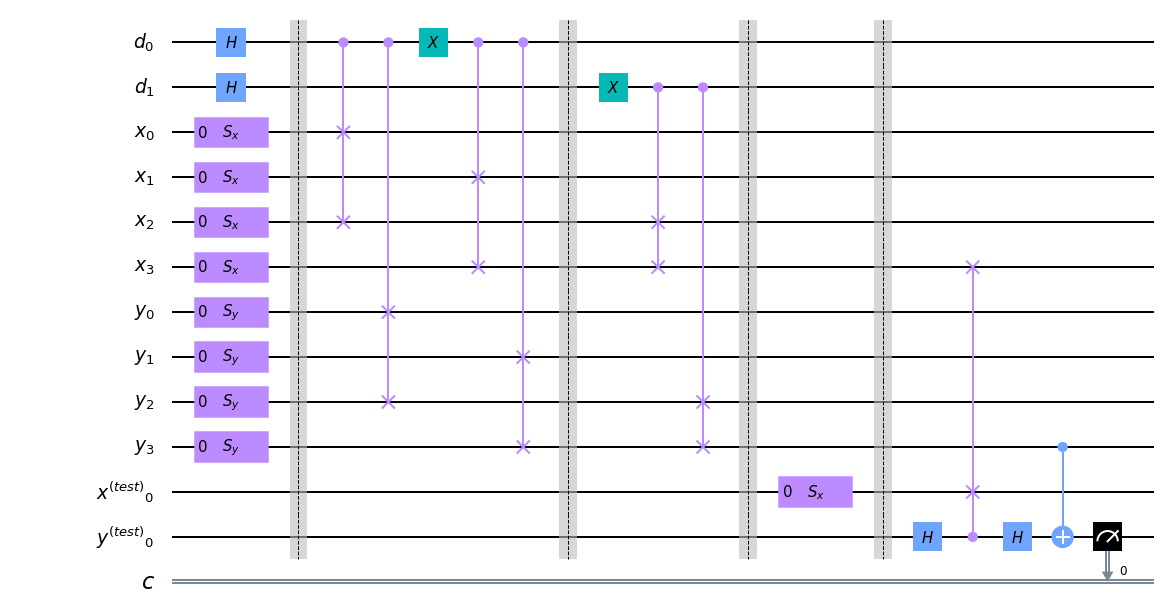

In [3]:
qc.draw(output='mpl', scale=.6,
        style={'fontsize':15, 'dpi':200})